# 線形モデル(linear model)
線形モデルは入力特徴量の線形関数(linear function)を用いて予測を行う。

## 線形モデルによる回帰
回帰問題に対する一般的な線形モデルは以下のようになる
$$
y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
$$
ここで、$x[0]~x[p]$はある一つのデータ点に対する特徴量（この場合は特徴量数がp+1）であり、wとbは学習するモデルのパラメータであり、yはモデルからの予測である。
特に、パラメータが一つしか無い場合は以下のようになる。
$$
y = w[0] * x[0] + b
$$
これは直線を意味し、w[0]は特徴量x[0]軸に対する傾き、bはy軸の切片を表す。

回帰における線形モデルは、単一の特徴量に対しては予測が直線になる回帰モデルとして特徴付けられる。特徴量が２つなら予測は平面に、高次元において（つまり特徴量が多い時）は予測は超平面になる。

多数の特徴量を持つデータに対しては、線形モデルは非常に協力である。特に、訓練データのデータポイント数よりも特徴量の数のほうが多い場合には、どのよなyでも完全に訓練データ・セットの線形関数としてモデル化できる。

In [3]:
# おまじない
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from IPython.display import display
%matplotlib notebook

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


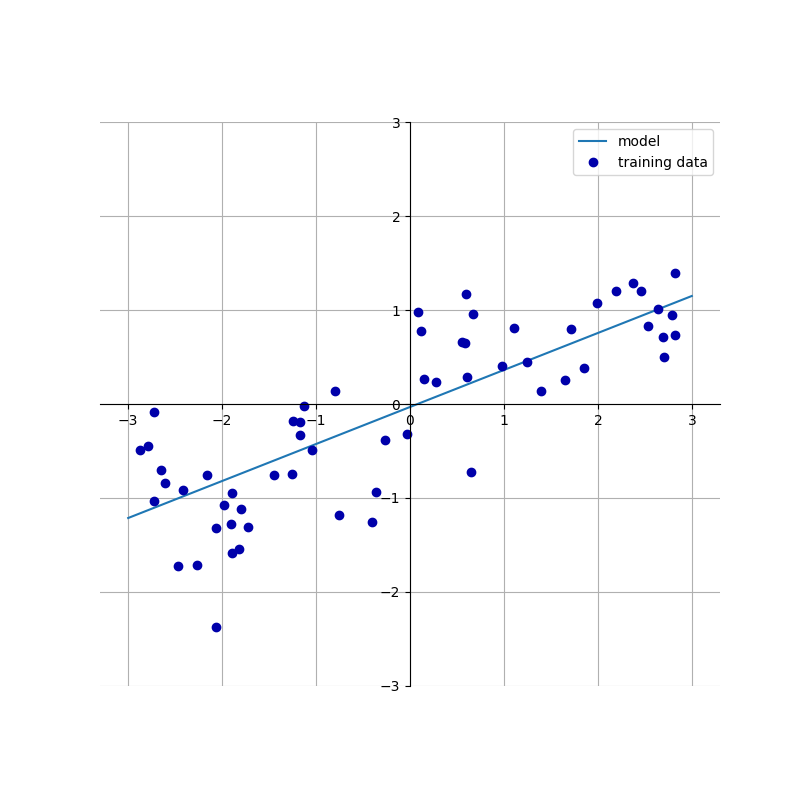

In [2]:
mglearn.plots.plot_linear_regression_wave()

## 通常最小二乗法(orginary least squares : OLS)
訓練データについて、予測と真の回帰ターゲットyとの平均二乗誤差(mean squared error)が最小になるように、パラメータwとbを求める。

In [4]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [5]:
print('lr.coef_ : {}'.format(lr.coef_))
print('lr.intercept_ : {}'.format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.03180434302675973


In [6]:
print('Training set score : {}'.format(lr.score(X_train,y_train)))
print('Test set score : {}'.format(lr.score(X_test,y_test)))

Training set score : 0.6700890315075756
Test set score : 0.6593368596863701


In [8]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [9]:
print('Training set score : {}'.format(lr.score(X_train,y_train)))
print('Test set score : {}'.format(lr.score(X_test,y_test)))

Training set score : 0.9520519609032728
Test set score : 0.6074721959665418


p.49
> 訓練セットとテストセットのスコアを比べると、訓練データに対しては非常に正確だが、テストセットの$R^2$値はずっと悪いことがわかる。
このように訓練セットとテストセットで性能が大きく異なるのは、過剰適合(過学習、overfitting)が起きている明らかな兆候だ。（つまり複雑すぎるのでもっと単純にする必要がある）そこで、以降の複雑度を制御できるモデルを探さなければならない。

## リッジ回帰(Ridge regression)
リッジ回帰は線形モデルによる回帰の一つである。予測に用いる式は通常は最小二乗法のものと同じである。しかし、リッジ回帰では、計数(w)の絶対値の大きさを可能な限り小さくするようにも最適化を行う。直感的には、予測をうまく行いつつ、個々の特徴量が出力に与える影響を小さくしたい。

In [13]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print('Train set score : {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(ridge.score(X_test,y_test)))

Train set score : 0.89
Test set score : 0.75


p.50
> Ridgeモデルでは、モデルの簡潔さ（０に近い係数の数）と、訓練セットに対する性能がトレードオフの関係になる。これらはalphaパラメータで調整できる。alphaを増やすと、係数はより０に近くなり、訓練セットに対する性能は低下するが、汎化にはそちらのほうがよいかもしれない。

In [14]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('Training set score : {:.2f}'.format(ridge10.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(ridge10.score(X_test,y_test)))

Training set score : 0.79
Test set score : 0.64


In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print('Training set score : {:.2f}'.format(ridge01.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(ridge01.score(X_test,y_test)))

Training set score : 0.93
Test set score : 0.77


<IPython.core.display.Javascript object>


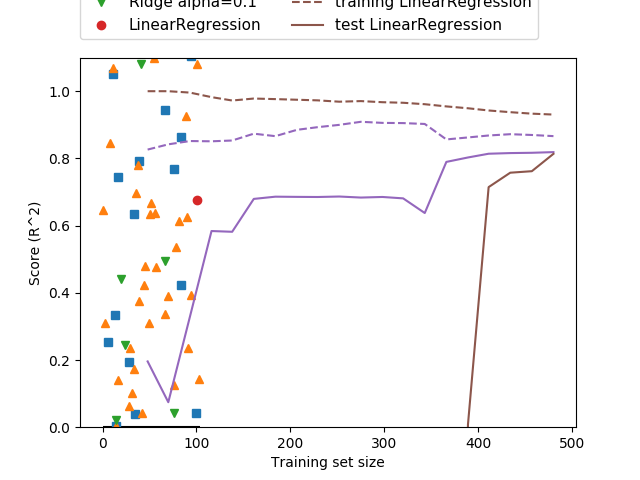

In [23]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

In [22]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.hlines(0,0,len(lr.coef_))
#plt.ylim(-25,25)
plt.legend()

<IPython.core.display.Javascript object>


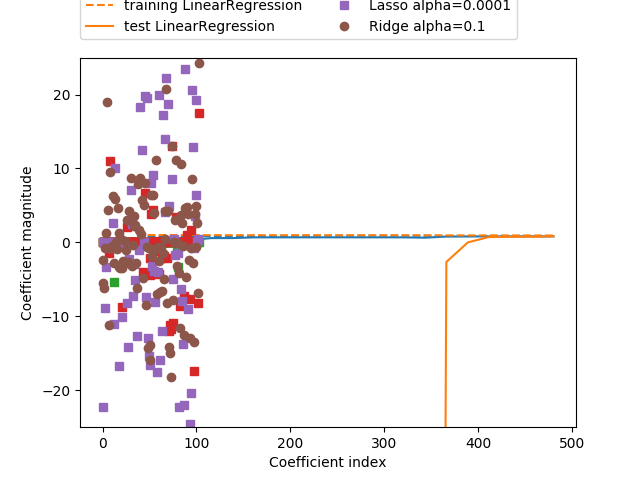

In [25]:
mglearn.plots.plot_ridge_n_samples()

上図は、boston_housingデータセットに対するリッジ回帰と線形回帰の学習曲線（学習データ数を変えた際にどうなるか）

- いづれの場合でも訓練スコアはテストスコアより高い
- リッジ回帰では正則化の影響で線形回帰（LinearRegression）よりも訓練データに対するスコアが低い
- しかし、テストデータに対してはリッジ回帰の方がスコアが高い（特にデータサイズが小さいときは顕著）
- 訓練データが増えれば増えるほどテストデータのスコアは両方とも上昇し、最終的にはほぼ同じになっている
  - 十分な訓練データがある場合には正則化は重要ではない
- データ増えた場合に訓練データスコアが下がっている
  - データ量が多くなると、学習自体が難しくなっていく

## 正則化項
機械学習における学習とは、以下の最適化問題を解くことと等価である（要出典）。

$$
\hat{w} = min(loss(w))
$$
$\hat{w}$は学習すべき係数パラメータで、$loss(w)$はパラメータが$w$であるときの誤差である。

ただし、過学習を抑えるためなどの目的でここに以下のような制約条件が課される場合がある。（これを**正則化項**という）

$$
\hat{w} = min(loss(w))\,\,subject\,\,to\,\,R(w) \le t
$$

$t$の値を大きくすると制約条件を与えない場合と同じことになり、$t$の値を小さくすることで制約をより強くすることができる。

この$R(w)$の種類として、Ridge(L2)正則化項やLasso(L1)正則化項がある。

## Ridge（L2）の正則化項
Ridgeの最適化項は以下のように定義できる（L2ノルムと呼ばれる）。
$$
R(w) = ||w||^2_2 = |w_1|^2 +  |w_2|^2 +  ... +  |w_p|^2 
$$

よって、Ridge正則化項を考慮した場合の学習は以下の通りである。

$$
\hat{w} = min(loss(w))\,\,subject\,\,to\,\,||w||^2_2 \le t
$$

これを直感的に説明するために、$w_1$と$w_2$の２次元で考えた場合の可視化結果が以下の通りである。（下図では$\beta_1$と$\beta_2$と表記されている）

$\beta^{OLS}_1$と$\beta^{OLS}_2$は通常の線形モデルで求まった解である。

ここにRidge（L2）正則化項を加えると、$\beta_1$と$\beta_2$が取りうる値は右図の赤い円の領域内に限定（制約）される。

誤差関数を最小二乗誤差とした場合、パラメータを変更したときの誤差は右図青い楕円のように表現できる（**要出典**）。（等高線のようなイメージ）

正則化項付きの線形モデルでは、赤い円と青い楕円の接点が解となる。

![image.png](https://stats.biopapyrus.jp/media/L2-regularization-2d-thumbn.png)


## Lasso回帰
リッジ回帰と同様にLassoも係数が０になるように制約をかけるが、リッジとの違いはLassoの場合にはいくつかの係数が完全に0になることである。

これは、モデルにおいていくつかの特徴量が完全に無視されるということである。自動的に特徴量を選択しているとも考えられる。いくつかの係数が０になると、モデルを解釈しやすくなり、どの特徴量が重要かがわかるようになる。

## Lassoの正則化項
Lassoの最適化項は以下のように定義できる（L１ノルムと呼ばれる）。
$$
R(w) = \sum^{p}_{k=1}|w_k| = |w_1| +  |w_2| +  ... +  |w_p|
$$

よって、Lasso正則化項を考慮した場合の学習は以下の通りである。

$$
\hat{w} = min(loss(w))\,\,subject\,\,to\,\,\sum^{p}_{k=1}|w_k| \le t
$$

これを直感的に説明するために、$w_1$と$w_2$の２次元で考えた場合の可視化結果が以下の通りである。（下図では$\beta_1$と$\beta_2$と表記されている）

$\beta^{OLS}_1$と$\beta^{OLS}_2$は通常の線形モデルで求まった解である。

ここにLasso（L1）正則化項を加えると、$\beta_1$と$\beta_2$が取りうる値は右図の赤い矩形の領域内に限定（制約）される。

誤差関数を最小二乗誤差とした場合、パラメータを変更したときの誤差は右図青い楕円のように表現できる（**要出典**）。（等高線のようなイメージ）

正則化項付きの線形モデルでは、赤い矩形と青い楕円の接点が解となる。

Ridge正則化との違いは、赤い矩形と青い楕円の接点を考えたときに、その設定は必ずパラメータの軸上に存在することである。これは、あるパラメータの値が０になることを表しており、特徴量の次元を削減したい場合などに用いられる。（スパースという言葉も使われる）

![image.png](https://stats.biopapyrus.jp/media/L1-regularization-2d-thumbn.png)

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print('Training set score : {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used : {}'.format(np.sum(lasso.coef_ != 0)))

Training set score : 0.29
Test set score : 0.21
Number of features used : 4


Lassoにも係数の０にしやすさを制御するためのパラメータalphaがある。より多くの特徴量を使用させたい場合はalphaの値を小さくする。（alphaのデフォルト値は１）

In [30]:
# 'max_iter'の値を増やさないと警告が発生する
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print('Training set score : {:.2f}'.format(lasso001.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(lasso001.score(X_test,y_test)))
print('Number of feature used : {}'.format(np.sum(lasso001.coef_ != 0)))

Training set score : 0.90
Test set score : 0.77
Number of feature used : 33


In [31]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print('Training set score : {:.2f}'.format(lasso00001.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(lasso00001.score(X_test,y_test)))
print('Number of feature used : {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score : 0.95
Test set score : 0.64
Number of feature used : 96


<IPython.core.display.Javascript object>


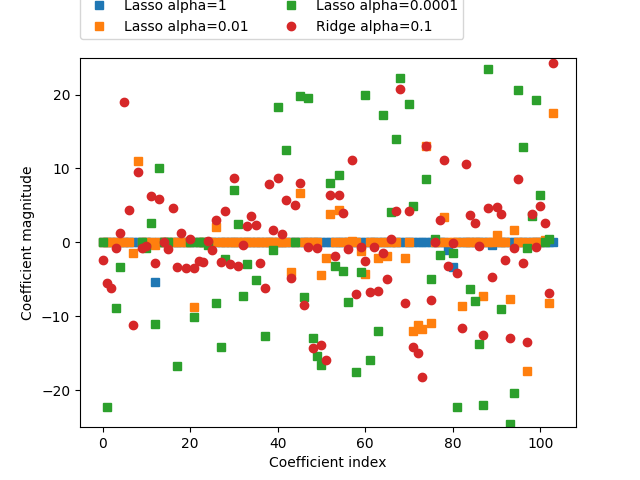

Text(0, 0.5, 'Coefficient magnitude')

In [36]:
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso001.coef_,'s',label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'s',label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

p.55
> 実際に使う場合には、この２つのうちリッジ回帰をまず試してみるとよいだろう。しかし、特徴量がたくさんあって、そのうち重要なものはわずかしかないことが予測されるのであれば、Lassoのほうが向いているだろう。同様に解釈しやすいモデルがほしいのなら、重要な特徴量のサブセットを選んでくれるLassoの方が理解しやすいモデルが得られるだろう。

> scikit-learnには、LassoとRidgeのペナルティを組み合わせたElasticNetクラスがある。実用上は、この組み合わせが最良の結果をもたらすが、それにはL1正則化のパラメータとL2正則化のパラメータの２つを調整するというコストがかかる。

In [37]:
# ElasticNetやってみる
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet().fit(X_train,y_train)
print('Training set score : {:.2f}'.format(elastic_net.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(elastic_net.score(X_test,y_test)))
print('Number of feature used : {}'.format(np.sum(elastic_net.coef_ != 0)))

Training set score : 0.33
Test set score : 0.22
Number of feature used : 38


## scikit-learnのElasticNetクラスのドキュメント
[ここ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
alphaパラメータ（デフォルト１）で全体の制約強度を決める。l1_ratioパラメータ($0<=l1_ratio<=1$)でL1正則化とL2正則化のどちらを優先するか決める。

In [39]:
elastic_net_a01 = ElasticNet(alpha=0.1,max_iter=100000).fit(X_train,y_train)
print('Training set score : {:.2f}'.format(elastic_net_a01.score(X_train,y_train)))
print('Test set score : {:.2f}'.format(elastic_net_a01.score(X_test,y_test)))
print('Number of feature used : {}'.format(np.sum(elastic_net_a01.coef_ != 0)))

Training set score : 0.72
Test set score : 0.55
Number of feature used : 58


In [48]:
def make_elasticnet(alpha,l1_ratio):
    print('alpha={},l1_ratio={}'.format(alpha,l1_ratio))
    elastic_net_a01 = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=100000).fit(X_train,y_train)
    print('Training set score : {:.2f}'.format(elastic_net_a01.score(X_train,y_train)))
    print('Test set score : {:.2f}'.format(elastic_net_a01.score(X_test,y_test)))
    print('Number of feature used : {}'.format(np.sum(elastic_net_a01.coef_ != 0)))

In [49]:
make_elasticnet(1,0.1)

alpha=1,l1_ratio=0.1
Training set score : 0.40
Test set score : 0.27
Number of feature used : 75


In [50]:
make_elasticnet(1,0.5)

alpha=1,l1_ratio=0.5
Training set score : 0.33
Test set score : 0.22
Number of feature used : 38


In [51]:
make_elasticnet(1,0.9)

alpha=1,l1_ratio=0.9
Training set score : 0.26
Test set score : 0.18
Number of feature used : 12


In [53]:
make_elasticnet(0.1,0.1)

alpha=0.1,l1_ratio=0.1
Training set score : 0.70
Test set score : 0.53
Number of feature used : 92


In [54]:
make_elasticnet(0.1,0.5)

alpha=0.1,l1_ratio=0.5
Training set score : 0.72
Test set score : 0.55
Number of feature used : 58


In [55]:
make_elasticnet(0.1,0.9)

alpha=0.1,l1_ratio=0.9
Training set score : 0.75
Test set score : 0.59
Number of feature used : 23


## 2.3.3.5 クラス分類のための線形モデル
２クラス分類
$$
\hat{y} = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
$$
この関数の値が０より小さければクラスは-１になる。０より大きければクラスは＋１になる。


線形モデルによる回帰では、出力は特徴量に関して直線や平面、高次元では超平面になる。線形モデルによるクラス分類の場合は、決定境界が入力の線形関数になる。言い換えると、線形の２クラス分類器は、**２つのクラスを直線や平面や超平面で分割する**ということだ。